# Database

https://www.idiap.ch/software/bob/docs/bob/bob.db.putvein/master/guide.html#protocols

In [2]:
from bob.bio.vein.configurations.putvein import database
import numpy as np
import bob.io.base

### Palm DB

In [2]:
all_Files = database.objects(protocol='palm-R_1', groups='world')
print(all_Files[0])
print(len(all_Files))
all_Files = database.objects(protocol='palm-R_1', groups='dev')
print(all_Files[0])
print(len(all_Files))
all_Files = database.objects(protocol='palm-R_1', groups='eval')
print(all_Files[0])
print(len(all_Files))

<File('Palm/o_001/Right/Series_1/P_o001_R_S1_Nr1.bmp': 'Palm/o_001/Right/Series_1/P_o001_R_S1_Nr1')>
300
<File('Palm/o_001/Right/Series_1/P_o001_R_S1_Nr1.bmp': 'Palm/o_001/Right/Series_1/P_o001_R_S1_Nr1')>
300
<File('Palm/o_026/Right/Series_1/P_o026_R_S1_Nr1.bmp': 'Palm/o_026/Right/Series_1/P_o026_R_S1_Nr1')>
300


### Wrist DB

In [3]:
all_Files = database.objects(protocol='wrist-R_1', groups='world')
print(all_Files[0])
print(len(all_Files))
all_Files = database.objects(protocol='wrist-R_1', groups='dev')
print(all_Files[0])
print(len(all_Files))
all_Files = database.objects(protocol='wrist-R_1', groups='eval')
print(all_Files[0])
print(len(all_Files))

<File('Wrist/o_001/Right/Series_1/W_o001_R_S1_Nr1.bmp': 'Wrist/o_001/Right/Series_1/W_o001_R_S1_Nr1')>
300
<File('Wrist/o_001/Right/Series_1/W_o001_R_S1_Nr1.bmp': 'Wrist/o_001/Right/Series_1/W_o001_R_S1_Nr1')>
300
<File('Wrist/o_026/Right/Series_1/W_o026_R_S1_Nr1.bmp': 'Wrist/o_026/Right/Series_1/W_o026_R_S1_Nr1')>
300


# Palm

## Load Train images

In [1]:
from bob.bio.vein.configurations.putvein import database
import numpy as np
import bob.io.base

print("start the code")
from tqdm import tqdm
import cv2




from bob.bio.vein.extractor import WideLineDetector
extractor = WideLineDetector()


all_Files = database.objects(protocol='palm-R_1', groups='world')
    
######################################################################    
all_imgs=[]
# all_feats=[]
all_client_ids=[]

for i,obj in tqdm(enumerate(all_Files)):
    path=obj.make_path('/idiap/resource/database/PUT_Vein_Dataset/','.bmp')
    #image = bob.io.base.load(path)
    image = cv2.imread(path,0)
    #image = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 
    ##image, mask = preprocessor(image)
#     image_and_mask = preprocessor(image)
#     feature = extractor(image_and_mask)
    
    all_imgs.append(image)
#     all_feats.append(feature)
    all_client_ids.append(obj.client_id)
    
    
        

all_imgs  = np.array(all_imgs)/255.0
# all_feats = np.array(all_feats)

/idiap/temp/hotroshi/anaconda3/envs/bob_env_pytorch/lib/python3.7/site-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "
0it [00:00, ?it/s]

start the code


300it [00:00, 326.72it/s]


In [8]:
image.shape

(768, 1024)

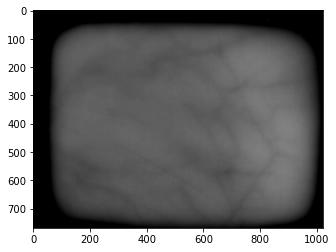

In [5]:
import cv2
cv2.imread(path,0).shape
import matplotlib.pyplot as plt

plt.imshow(cv2.imread(path,0), vmin=0, vmax=255,cmap='gray')

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=7,
                             width_shift_range=0.025,
                             height_shift_range=0.025,
                             channel_shift_range=0.075,
                             zoom_range=(0.95,1.05)
                             )

all_imgs = np.reshape(all_imgs, [all_imgs.shape[0], all_imgs.shape[1], all_imgs.shape[2], 1])
all_imgs_aug       = np.copy(all_imgs)
all_client_ids_aug = all_client_ids.copy()

itr=0
for gen_imgs, gen_lables in datagen.flow(all_imgs, 
                                         all_client_ids,
                                         batch_size = all_imgs.shape[0],
                                         seed=itr
                                        ):
    itr += 1
    print(itr, all_imgs_aug.shape[0])
    all_imgs_aug = np.append(all_imgs_aug, 
                             gen_imgs,
                             axis=0)
    for ID in gen_lables:
        all_client_ids_aug.append(ID)
    
    if itr==9:
        break
print("Total Aug images:", all_imgs_aug.shape[0])


np.save('palm_all_imgs_aug.npy', all_imgs_aug) 

import pickle
with open('palm_all_client_ids_aug.pkl','wb') as f:
    pickle.dump(all_client_ids_aug,f)

1 300
2 600
3 900
4 1200
5 1500
6 1800
7 2100
8 2400
9 2700
Total Aug images: 3000


In [3]:
all_imgs_aug.shape

(3000, 768, 1024, 1)

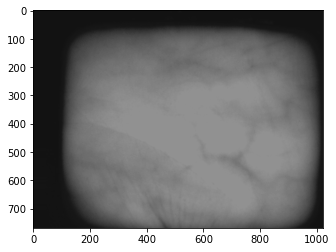

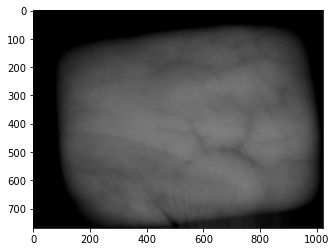

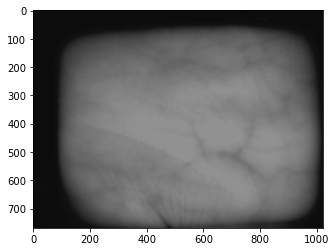

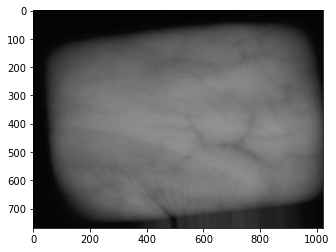

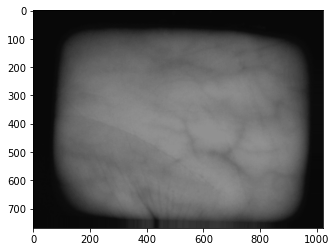

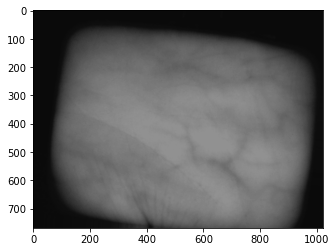

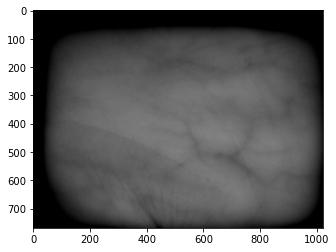

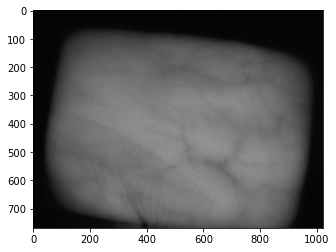

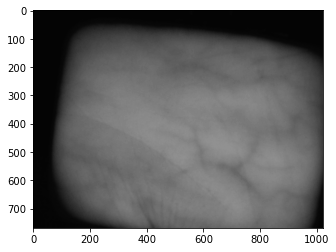

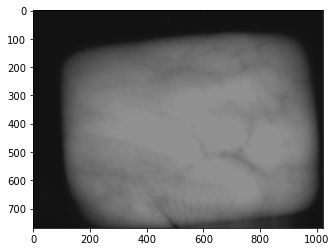

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 
   
# Initialising the ImageDataGenerator class. 
# We will pass in the augmentation parameters in the constructor. 
datagen = ImageDataGenerator(rotation_range=7,
                             width_shift_range=0.025,
                             height_shift_range=0.025,
                             channel_shift_range=0.075,
                             zoom_range=(0.95,1.05)
                            )
import matplotlib.pyplot as plt
all_ims = np.reshape(all_imgs, [all_imgs.shape[0], all_imgs.shape[1], all_imgs.shape[2], 1])
i=0
for im in datagen.flow(all_ims[:1,:,:,:], batch_size = 10):
    arr = np.asarray(im[0,:,:,0])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
    plt.show()
    i+=1
    if i==10:
        break
        
# Links:
## https://www.geeksforgeeks.org/python-data-augmentation/
## https://keras.io/api/preprocessing/image/#imagedatagenerator-class

### feature extraction

In [ ]:
import numpy as np
from tqdm import tqdm
from bob.bio.vein.preprocessor import NoCrop, TomesLeeMask, HuangNormalization, \
    NoFilter, Preprocessor

import cv2
class resize_and_gray():
    def __call__(self,image):
        #image= np.transpose(image,(1,2,0))
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return cv2.resize(image, (0,0), fx=0.5, fy=0.5) 

preprocessor = Preprocessor(
    crop=resize_and_gray(),#NoCrop(),
    mask=TomesLeeMask(),
    normalize=HuangNormalization(),
    filter=NoFilter(),
    )

######################################################################    

from bob.bio.vein.extractor import WideLineDetector
wld_extractor = WideLineDetector()

from bob.bio.vein.extractor import MaximumCurvature
mc_extractor = MaximumCurvature()

from bob.bio.vein.extractor import RepeatedLineTracking
rlt_extractor = RepeatedLineTracking()
######################################################################    
all_feats_wld=[]
all_feats_mc =[]
all_feats_rlt=[]
all_imgs_prep=[]
# all_imgs_aug = np.load('palm_all_imgs_aug.npy') 

print("preparing data")
mylog_csv_path="my_log"
mylog=open(mylog_csv_path,'w')
mylog.close()

for i in tqdm(range(all_imgs_aug.shape[0])):
    image = all_imgs_aug[i,:,:,0]*255.0
    image_and_mask = preprocessor(image)
    
    wld = wld_extractor(image_and_mask)
    mc  = mc_extractor (image_and_mask)
    rlt = rlt_extractor(image_and_mask)
    
    all_feats_wld.append(wld)
    all_feats_mc.append(mc)
    all_feats_rlt.append(rlt)
    all_imgs_prep.append(image_and_mask[0])
    
    mylog=open(mylog_csv_path,'a')
    print('%d/%d' % (i+1, all_imgs_aug.shape[0]), end='\r',  file=mylog)
    mylog.close()
       
all_feats_wld=np.array(all_feats_wld)
all_feats_mc=np.array (all_feats_mc)
all_feats_rlt=np.array(all_feats_rlt)
all_imgs_prep=np.array(all_imgs_prep)

np.save('palm_all_wld_aug_feats.npy', all_feats_wld) 
np.save('palm_all_mc_aug_feats.npy', all_feats_mc) 
np.save('palm_all_rlt_aug_feats.npy', all_feats_rlt) 
np.save('palm_all_imgs_aug_prep.npy', all_imgs_prep) 

######################################################################